# Otávio Cardoso e Henrique Guazzelli


## Projeto 2 - Ciência dos Dados


### -> Introdução

O Projeto 2 consiste no estudo da facilidade de um usuário conseguir achar a página de um projeto em duas interfaces de portfólios de projetos de engenharia do insper. Para o nosso grupo, o usuário deveria ser capaz de encontrar ou o projeto da estação metereológica (tipo 0) ou o sistema mecânico (tipo2) em aleatoriamente uma das duas interfaces. Na interface A, a divisão de projetos se dá por meio de competências desenvolvidas pelos alunos, já na interface B, a divisão dos projetos se dá por meio de matérias pelos alunos. As interfaces foram desenvolvidas no curso de co-design de aplicativos como o primeiro projeto. Desta forma, vamos analisar o tempo que usuários demoram para achar os projetos e a partir desta análise, definir qual deles é mais eficiente e objetivo.

### -> Importando e selecionando o database

In [2]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [3]:
arquivo = open("teste-ab-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [4]:
for k,v in dados_fire["logs"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [5]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [6]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)
print(dataframe)

             tempo    tipo     user_id versao
0    1478399665570  inicio  1212005310     B2
1    1478387910498  inicio  2381392679     B2
2    1478385760251  inicio  4062351423      B
3    1478389687722  inicio   619603522     B2
4    1478385877431  inicio  1958848493     A2
5    1478387896114  inicio  1537021356      B
6    1478385929817  inicio  4088041952      B
7    1478536994730   final  3789181448      B
8    1478433227331   final  3789181448      B
9    1478399678716   final  1212005310     B2
10   1478525743404  inicio  1383846613      A
11   1478453623219  inicio  4172488568     B2
12   1478385658911  inicio  1132830238     A2
13   1478525189265  inicio  1814136725      B
14   1478386129712  inicio  4088041952      A
15   1478549609336  inicio   112988659     A2
16   1478385720608  inicio  3299522247     B2
17   1478386619891  inicio  1112366015      A
18   1478446994904  inicio    44003299      B
19   1478393554994  inicio  3656905574      B
20   1478385793684  inicio  102033

In [7]:
agrupado = dataframe.groupby(by=["user_id", "versao"])
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once
users = list(users)
resultados = []

for u in users:
    for versao in ["A", "B","A2","B2"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})


In [8]:
grupo1.sort_values(by="tempo")  
dataframe_resumo = pd.DataFrame.from_records(resultados)
dataframe_resumo.delta_t/=1000
d = dataframe_resumo 
d

,delta_t,user_id,versao
0,152.915,1572420869,A2
1,149811.770,3789181448,B
2,134268.383,3789181448,A2
3,129884.277,3789181448,B2
4,13.852,3857193483,A
5,31.828,167343643,B2
6,371.593,1132830238,B2
7,99.693,507758501,A
8,26.828,3724356519,B
9,9.328,1471369903,B


In [ ]:
d.delta_t = d.delta_t.astype('float')
d.versao = d.versao.astype('category')

### -> Teste A

### - análise descritiva

In [50]:
A = d.delta_t[(d.versao=='A')]
A.describe()

count      6.000000
mean      71.940500
std       65.404213
min       13.852000
25%       15.932250
50%       60.705000
75%      108.474750
max      170.975000
Name: delta_t, dtype: float64

Tempos para encontrar o projeto da estação metereológica na interface A


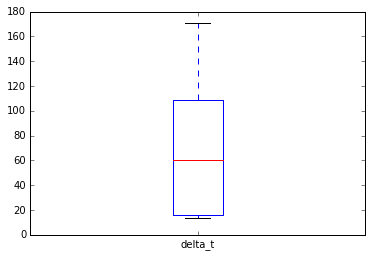

In [51]:
print("Tempos para encontrar o projeto da estação metereológica na interface A")
A.plot (kind='box') 

In [74]:
faixa = np.arange(10,171,20)
variávelCat = pd.cut(d.delta_t[(d.versao=='A')], faixa) 
variávelCat.value_counts()

(10, 30]      3
(110, 130]    1
(90, 110]     1
(150, 170]    0
(130, 150]    0
(70, 90]      0
(50, 70]      0
(30, 50]      0
dtype: int64

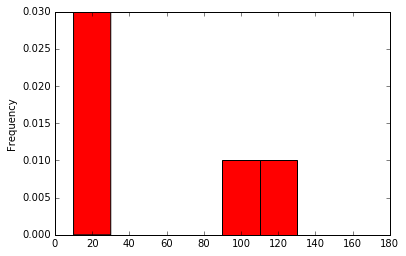

In [77]:
print("")
plot = d.delta_t[(d.versao=='A')].plot.hist(bins = faixa, normed =1, color = 'r')
plt.show()

In [ ]:
#Assumindo que a variável segue uma distribuição normal


### -> Teste B

### - Análise descritiva

In [52]:
B = d.delta_t[(d.delta_t < 149811.770)&(d.versao=='B')]
B.describe()

count      8.000000
mean      46.315750
std       41.574159
min        7.825000
25%       10.325500
50%       37.176000
75%       65.457000
max      120.231000
Name: delta_t, dtype: float64

Tempos para encontrar o projeto da estação metereológica na interface B


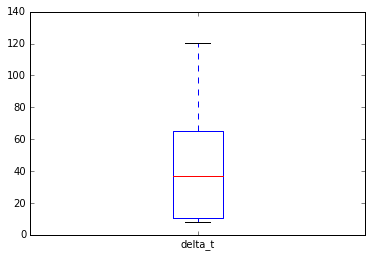

In [53]:
print("Tempos para encontrar o projeto da estação metereológica na interface B")
B.plot (kind='box') 

In [82]:
variávelCat2 = pd.cut(d.delta_t[(d.delta_t < 149811.770)&(d.versao=='B')], faixa) 
variávelCat2.value_counts()

(10, 30]      2
(110, 130]    1
(90, 110]     1
(50, 70]      1
(30, 50]      1
(150, 170]    0
(130, 150]    0
(70, 90]      0
dtype: int64

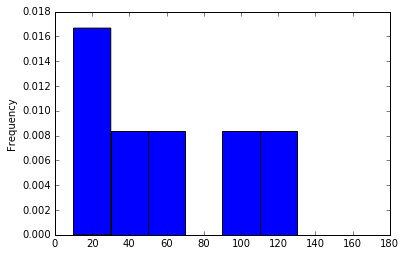

In [83]:
print("")
plot = d.delta_t[(d.delta_t < 149811.770)&(d.versao=='B')].plot.hist(bins = faixa, normed =1, color = 'b')
plt.show()

### -> Conclusão teste AB

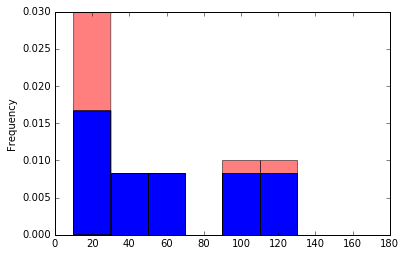

In [87]:
plot = d.delta_t[(d.versao=='A')].plot.hist(bins = faixa, normed =1, alpha = 0.5, color = 'r')
plot = d.delta_t[(d.delta_t < 149811.770)&(d.versao=='B')].plot.hist(bins = faixa, normed =1, color = 'b')

#### Conclusão análise descritiva AB

Concluindo, a partir das análises feitas anteriormente, é possível conluir que apesar da média de delta t para a interface A ser maior do que a da interface B, pode-se perceber que há uma maior frequência para tempos menores para os usuários que acessaram a interface A do que aqueles que acessaram a interface B. Está analise poderia ser mais precisa caso o número de acessos fosse maior.

Logo, a nossa hipótese inicial foi parcialmente incorreta, já que em média a interface B se provou mais eficiente e objetiva do que a interface A para o projeto da estação metereológica.

#### Análise de inferência A2B2

-> hipóteses:

H0: miA = miB

HA: miA != miB


In [11]:
#Fonte: livro Noções de Probabilidade e estatística (Magalhães e Lima) pg.325 Caso 3B
medamA = 71.9405
medamB = 46.315750
#medamD = medamA -medamB
sA = 65.404213
nA = 6
sB = 41.574159
nB = 8
#sigD^2 = ((((sA)^2)/nA) + (((sB)^2)/nB))
medamD = 25.62475
sigD = 30.4795535

In [14]:
#(medamD-miD)/(sigD) ˜ t(v)
# v = (sigD^2)^2/(((((sA^2)/(nA))^2)/(nA-1))+((((sB^2)/(nB))^2)/(nB-1)))
# v = graus de liberdade
v = 7.96 
#p = 5%
#logo:
miD = 46.45

SyntaxError: invalid syntax (<ipython-input-14-e653dc71fd99>, line 5)

### -> Teste A2

### - Análise descritiva

In [54]:
A2 = d.delta_t[(d.delta_t < 134268.383 )&(d.versao=='A2')]
A2.describe()

count      5.000000
mean     230.675600
std      256.958803
min       31.036000
25%       51.509000
50%      152.915000
75%      256.621000
max      661.297000
Name: delta_t, dtype: float64

Tempos para encontrar o projeto de sistema mecânico na interface A


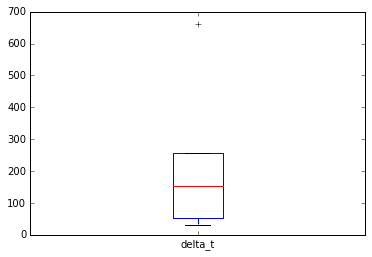

In [55]:
print("Tempos para encontrar o projeto de sistema mecânico na interface A")
A2.plot (kind='box') 

In [97]:
faixa2 = np.arange(30,200,20)
variávelCat3 = pd.cut(d.delta_t[(d.delta_t < 134268.383)&(d.versao=='A2')], faixa2) 
variávelCat3.value_counts()

(150, 170]    1
(50, 70]      1
(30, 50]      1
(170, 190]    0
(130, 150]    0
(110, 130]    0
(90, 110]     0
(70, 90]      0
dtype: int64

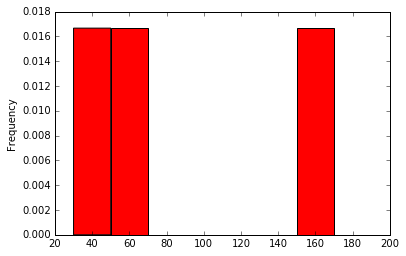

In [101]:
print("")
plot = d.delta_t[(d.delta_t < 134268.383)&(d.versao=='A2')].plot.hist(bins = faixa2, normed =1, color = 'r')
plt.show()

### -> Teste B2

### - Análise descritiva

In [58]:
B2 = d.delta_t[(d.delta_t < 129884.277 )&(d.versao=='B2')]
B2.describe()

count      8.000000
mean      84.489625
std      122.224741
min       13.146000
25%       17.904750
50%       38.207500
75%       70.091500
max      371.593000
Name: delta_t, dtype: float64

Tempos para encontrar o projeto de sistema mecânico na interface A


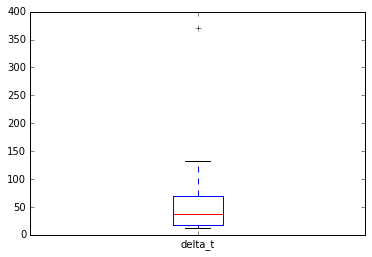

In [59]:
print("Tempos para encontrar o projeto de sistema mecânico na interface A")
B2.plot (kind='box') 

In [99]:
variávelCat4 = pd.cut(d.delta_t[(d.delta_t < 129884.277)&(d.versao=='B2')], faixa2) 
variávelCat4.value_counts()

(30, 50]      3
(130, 150]    1
(170, 190]    0
(150, 170]    0
(110, 130]    0
(90, 110]     0
(70, 90]      0
(50, 70]      0
dtype: int64

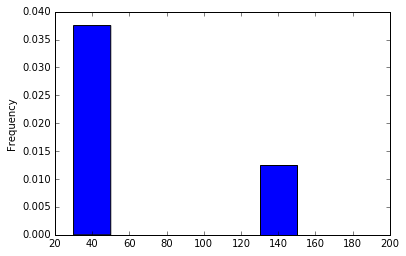

In [100]:
print("")
plot = d.delta_t[(d.delta_t < 129884.277)&(d.versao=='B2')].plot.hist(bins = faixa2, normed =1, color = 'b')
plt.show()

### -> Conclusão teste A2B2

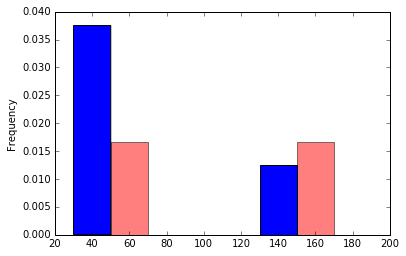

In [102]:
plot = d.delta_t[(d.delta_t < 134268.383)&(d.versao=='A2')].plot.hist(bins = faixa2, normed =1, alpha = 0.5, color = 'r')
plot = d.delta_t[(d.delta_t < 129884.277)&(d.versao=='B2')].plot.hist(bins = faixa2, normed =1, color = 'b')

#### Conclusão Análise descritiva A2B2

Concluindo, a partir das análises feitas anteriormente, é possível conluir que além da média de delta t para a interface A ser muito maior do que a da interface B, pode-se perceber que há uma maior frequência para tempos menores para os usuários que acessaram a interface B do que aqueles que acessaram a interface A. Está analise poderia ser mais precisa caso o número de acessos fosse maior.
Logo, a nossa hipótese inicial foi parcialmente incorreta, já que em média a interface B se provou mais eficiente e objetiva do que a interface A para o projeto da estação metereológica.

#### Análise de inferência A2B2

-> hipóteses:

H0: miA2 = miB2

HA: miA2 != miB2


In [ ]:
#Fonte: livro Noções de Probabilidade e estatística (Magalhães e Lima) pg.325 Caso 3B
medamA2 = 230.675600
medamB2 = 84.489625
#medamD2 = medamA -medamB
sA2 = 256.958803
nA2 = 5
sB2 = 122.224741
nB2 = 8
#sigD2^2 = ((((sA)^2)/nA) + (((sB)^2)/nB))
medamD2 = 146.185975
sigD2 = 15073.53738

In [15]:
#(medamD2-miD2)/(sigD2) ˜ t(v2)
# v2 = (sigD2^2)^2/(((((sA2^2)/(nA2))^2)/(nA2-1))+((((sB2^2)/(nB2))^2)/(nB2-1)))
# v2 = graus de liberdade
v2 = 5
# p = 5%
#logo: 
miD = 

SyntaxError: invalid syntax (<ipython-input-15-aaa3ca9e3f0a>, line 7)